In [7]:
from keras.models import load_model
model = load_model('./U_D_model/unet.h5')

In [8]:
from keras.datasets import mnist 

# MNIST Load Normalization
(x_train, _), (x_test, _) = mnist.load_data()
y_train = x_train[:1000].astype('float32') / 255.
y_test = x_test[:1000].astype('float32') / 255. 

print(y_train.shape)
print(y_test.shape)

(1000, 28, 28)
(1000, 28, 28)


In [9]:
# conv2d input reshape (width*height*cannel)
y_train = y_train.reshape((y_train.shape[0],28,28,1))
y_test = y_test.reshape((y_test.shape[0],28,28,1))
print(y_train.shape)
print(y_test.shape)

(1000, 28, 28, 1)
(1000, 28, 28, 1)


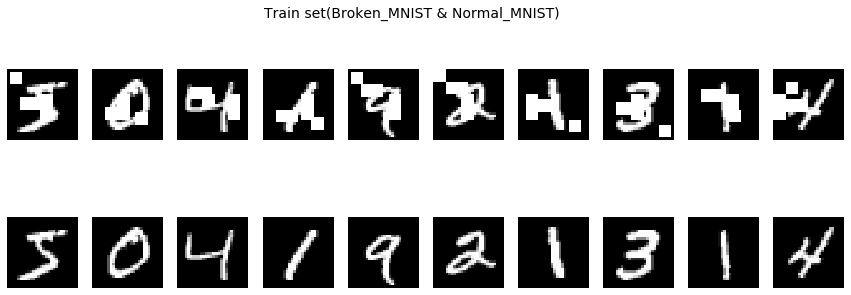

In [10]:
import numpy as np 

x_train = y_train.copy()

# noise range
rn = 5

# 랜덤 깨진 MNISt 만들기 
for i in range(0, x_train.shape[0]) : 
    ix = np.random.randint(0, x_train.shape[1]-rn)
    iz = np.random.randint(0, x_train.shape[1]-rn)
    ic = np.random.randint(0, x_train.shape[1]-rn)
    x_train[i, 10:20, ix:ix+rn] = 1.
    x_train[i, iz:iz+rn , 5:14] = 1.
    x_train[i, ic:ic+rn , ic:ic+rn] = 1.

import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2,10, figsize=(15, 5))
for i in range(10) :
    fig.suptitle('Train set(Broken_MNIST & Normal_MNIST)', fontsize=14)
    axs[0, i].set_axis_off()
    axs[0, i].imshow(x_train[i].reshape(28,28), cmap='gray')
    axs[1, i].set_axis_off()
    axs[1, i].imshow(y_train[i].reshape(28,28), cmap='gray')
plt.show()
plt.close(fig)

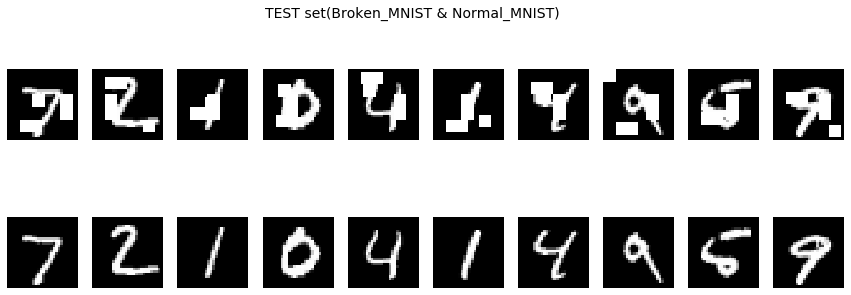

In [11]:
x_test = y_test.copy()

# 랜덤 깨진 MNISt 만들기 
for i in range(0, x_test.shape[0]) : 
    ix = np.random.randint(0, x_test.shape[1]-rn)
    iz = np.random.randint(0, x_test.shape[1]-rn)
    ic = np.random.randint(0, x_test.shape[1]-rn)
    x_test[i, 10:20, ix:ix+rn] = 1.
    x_test[i, iz:iz+rn , 5:14] = 1.
    x_test[i, ic:ic+rn , ic:ic+rn] = 1.

import matplotlib.pyplot as plt 

fig, axs = plt.subplots(2,10, figsize=(15, 5))
for i in range(10) :
    fig.suptitle('TEST set(Broken_MNIST & Normal_MNIST)', fontsize=14)
    axs[0, i].set_axis_off()
    axs[0, i].imshow(x_test[i].reshape(28,28), cmap='gray')
    axs[1, i].set_axis_off()
    axs[1, i].imshow(y_test[i].reshape(28,28), cmap='gray')
plt.show()
plt.close(fig)

1/1 [==============================] - 0s 254ms/step
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


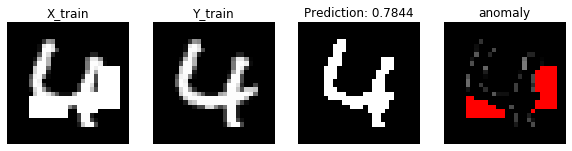

1/1 [==============================] - 0s 3ms/step
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


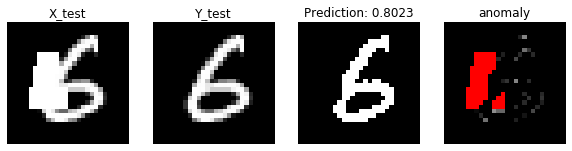

In [12]:
def plotPredictions(model, x_train, y_train, x_test, y_test):
    ix = np.random.randint(0, len(x_train))

    input_ = x_train[ix:ix+1]
    mask_ = y_train[ix:ix+1]

    preds_train = model.predict(input_)
    preds_train_t = (preds_train > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.title("X_train")
    plt.axis('off')
    plt.imshow(input_[0].reshape((28,28)), 'gray')

    plt.subplot(1,4,2)
    plt.title("Y_train")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')

    plt.subplot(1,4,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_train_t[0][:,:,0], 'gray')

    # train 이상 영역
    train_residual = input_ - preds_train_t
    train_residual_ = train_residual.reshape((28,28))
    train_residual_ = np.stack((train_residual_,)*3, -1) # 3채널로 변경 RGB 형식
    rows, cols, channels = train_residual_.shape

    # changing 255 to 0 in first channel
    for i in range(rows): 
        for j in range(cols):
            if train_residual_[i, j, 0] == 1 :
                train_residual_[i, j, 0] = 1

    for i in range(rows):
        for j in range(cols):
            if train_residual_[i, j, 1] == 1 :
                train_residual_[i, j, 1] = 0

    for i in range(rows):
        for j in range(cols):
            if train_residual_[i, j, 2] == 1 :
                train_residual_[i, j, 2] = 0            

    plt.subplot(1,4,4)
    plt.title("anomaly")
    plt.axis('off')
    plt.imshow(train_residual_)
    plt.show()
    plt.close()

    ix = np.random.randint(0, len(x_test))
    input_ = x_test[ix:ix+1]
    mask_ = y_test[ix:ix+1]
    preds_test = model.predict(input_)
    preds_test_t = (preds_test > 0.5).astype(np.uint8)

    plt.figure(figsize=(10,10))
    plt.subplot(1,4,1)
    plt.title("X_test")
    plt.axis('off')
    plt.imshow(input_[0].reshape((28,28)), 'gray')

    plt.subplot(1,4,2)
    plt.title("Y_test")
    plt.axis('off')
    plt.imshow(mask_[0][:,:,0], 'gray')

    plt.subplot(1,4,3)
    ret = model.evaluate(input_, mask_)
    plt.title("Prediction: %.4f" % (ret[1]))
    plt.axis('off')
    plt.imshow(preds_test_t[0][:,:,0], 'gray')

    # test 이상 영역
    test_residual = input_ - preds_test_t
    test_residual_ = test_residual.reshape((28,28))
    test_residual_ = np.stack((test_residual_,)*3, -1) # 3채널로 변경 RGB 형식
    rows, cols, channels = test_residual_.shape
    
    # changing 255 to 0 in first channel
    for i in range(rows):
        for j in range(cols):
            if test_residual_[i, j, 0] == 1 :
                test_residual_[i, j, 0] = 1

    for i in range(rows):
        for j in range(cols):
            if test_residual_[i, j, 1] == 1 :
                test_residual_[i, j, 1] = 0

    for i in range(rows):
        for j in range(cols):
            if test_residual_[i, j, 2] == 1 :
                test_residual_[i, j, 2] = 0            

    plt.subplot(1,4,4)
    plt.title("anomaly")
    plt.axis('off')
    plt.imshow(test_residual_)
    plt.show()
    plt.close()

# 색칠하기
plotPredictions(model, x_train, y_train, x_test, y_test)